<a href="https://colab.research.google.com/github/Mingyang0816/Startup-Founders-Graph-Analysis/blob/main/Foreign_Citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foreign Citations Notebook

Aimed to determine the "success" of startup founders by analyzing the distribution of foreign journals that cited journals published by founders. Created a tree-map for each founder to plot distribution of foreign journals.

In [ ]:
pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=e89f7cb43b41c89f41ffdf979eb25187ac7c4bd13de451afce6df2f5a211f222
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
!pip install squarify

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import langid
import squarify

# Entrepreneurs

In [ ]:
# Load entre publications data
entre_pubs = pd.read_excel("entrepreneur_pubs.xlsx")
entre_pubs.shape

(411, 8)

In [ ]:
# Load entre citations data
entre_cits = pd.read_excel("entrepreneur_citations.xlsx")
entre_cits.shape

(28461, 5)

In [ ]:
# Remove duplicate rows
entre_pubs = entre_pubs.drop_duplicates(subset = ["title", "researcher"])
entre_pubs.shape

(388, 8)

In [ ]:
# Join both dataframes
entre_df = pd.merge(entre_cits, entre_pubs, left_on = "cited", right_on = "title", how = "left")
entre_df.shape

(31906, 13)

In [ ]:
entre_df.head()

,cited,citing,authors_x,publication_x,snippet,researcher,title,authors_y,position,publication_y,year,num_citations,citation_link
0,Solution hybrid selection with ultra-long olig...,Liquid biopsy for glioma using cell-free DNA i...,"['R Otsuji', 'Y Fujioka', 'N Hata', 'D Kuga', ...","Cancers, 2024",Simple Summary Glioma is one of the most commo...,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5.0,Nature biotechnology 27,2009,1736.0,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Solution hybrid selection with ultra-long olig...,Functional Genome Analysis and Genome Editing ...,"['KL Bhutia', 'S Kumari', 'K Anjani', 'A Kisk']",CRISPR and Plant …,"With time, the global population and demand fo...",Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5.0,Nature biotechnology 27,2009,1736.0,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Solution hybrid selection with ultra-long olig...,Mini-review of DNA Methylation Detection Techn...,"['H Zhang', 'L Liu', 'M']","ACS sensors, 2024",DNA methylation is the dominant epigenetic mec...,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5.0,Nature biotechnology 27,2009,1736.0,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Solution hybrid selection with ultra-long olig...,Target enrichment sequencing coupled with GWAS...,"['AE Watson', 'B Guitton', 'A Soriano', 'R Riv...","Frontiers in Plant …, 2024",The timing of floral budbreak in apple has a s...,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5.0,Nature biotechnology 27,2009,1736.0,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Solution hybrid selection with ultra-long olig...,Genetic variation of olfactory receptor multig...,['AM SHOAIB'],No publication,Targeted capture sequencing has revolutionized...,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5.0,Nature biotechnology 27,2009,1736.0,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
# Filter relevant columns
entre_df = entre_df[["researcher", "title", "citing", "year"]]
entre_df.head()

,researcher,title,citing,year
0,Emily Leproust,Solution hybrid selection with ultra-long olig...,Liquid biopsy for glioma using cell-free DNA i...,2009
1,Emily Leproust,Solution hybrid selection with ultra-long olig...,Functional Genome Analysis and Genome Editing ...,2009
2,Emily Leproust,Solution hybrid selection with ultra-long olig...,Mini-review of DNA Methylation Detection Techn...,2009
3,Emily Leproust,Solution hybrid selection with ultra-long olig...,Target enrichment sequencing coupled with GWAS...,2009
4,Emily Leproust,Solution hybrid selection with ultra-long olig...,Genetic variation of olfactory receptor multig...,2009


In [ ]:
# Identify language of journal being cited

def detect_lang(title):

    try:
        lang, prob = langid.classify(title)
        return lang

    except:
        return "unknown"

In [ ]:
entre_df["language"] = entre_df["citing"].apply(detect_lang)
entre_df.head()

,researcher,title,citing,year,language
0,Emily Leproust,Solution hybrid selection with ultra-long olig...,Liquid biopsy for glioma using cell-free DNA i...,2009,en
1,Emily Leproust,Solution hybrid selection with ultra-long olig...,Functional Genome Analysis and Genome Editing ...,2009,en
2,Emily Leproust,Solution hybrid selection with ultra-long olig...,Mini-review of DNA Methylation Detection Techn...,2009,en
3,Emily Leproust,Solution hybrid selection with ultra-long olig...,Target enrichment sequencing coupled with GWAS...,2009,en
4,Emily Leproust,Solution hybrid selection with ultra-long olig...,Genetic variation of olfactory receptor multig...,2009,en


In [ ]:
# Save dataframe as Excel file
entre_lang_df = pd.read_excel("entrepreneur_citations_language.xlsx")

In [ ]:
def author_lang(df):
    '''
    Calculate frequency of journals written in various foreign languages that cited each founder.

    Parameters
    ----------
    df: dataframe consisting of research publications, journals that cited them, and language of journals

    Return
    ------
    lang_df: dataframe indicating frequency of journals written in various foreign languages that cited each founder

    '''

    # Group by researcher and language, then calculate occurrences
    lang_df = df.groupby("researcher")[["language"]].value_counts()

    # Reset index and sort values
    lang_df = lang_df.reset_index(name = "Counts").sort_values(by = ["researcher", "language"])

    return lang_df

In [ ]:
entre_lang = author_lang(entre_lang_df)
entre_lang.head(50)

,researcher,language,Counts
20,Chris Urmson,am,1
13,Chris Urmson,cs,4
16,Chris Urmson,da,2
2,Chris Urmson,de,64
0,Chris Urmson,en,6100
6,Chris Urmson,es,20
21,Chris Urmson,et,1
22,Chris Urmson,eu,1
23,Chris Urmson,fi,1
5,Chris Urmson,fr,21


In [ ]:
def lang_treeplot(author, df, min_cit):
    '''
    Plot frequency of journals written in various foreign languages that cited each founder.

    Parameters
    ----------
    author: full name of founder
    df: dataframe indicating frequency of journals written in various foreign languages that cited each founder
    min_cit: threshold value -- only languages with more than min_cit number of journals will be displayed

    '''

    # Filter rows corresponding to founder
    author_lang = df[df["researcher"] == author][["language", "Counts"]]

    # Filter languages that are non-English
    author_lang = author_lang[author_lang["language"] != "en"]

    # Filter languages with number of journals higher than threshold value
    author_lang = author_lang[author_lang["Counts"] >= min_cit]

    # Plot treemap
    sns.set_style(style = "whitegrid")
    labels = author_lang["language"]
    colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]
    treemap_labels = [x + " - " for x in labels] + author_lang["Counts"].astype(str)
    squarify.plot(sizes = author_lang["Counts"], label = treemap_labels, alpha = 0.6, color = colors, text_kwargs = {"fontsize": 8})
    plt.title(f"Number of Foreign Citations for {author}", weight = "bold")
    plt.axis("off")
    plt.show()

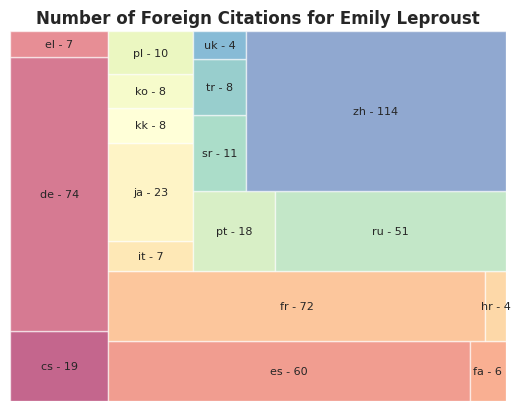

In [ ]:
lang_treeplot("Emily Leproust", entre_lang, 4)

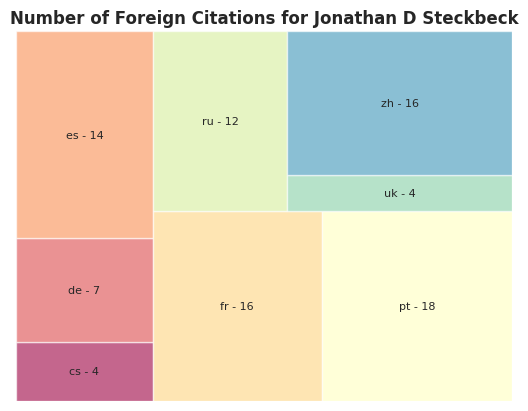

In [ ]:
lang_treeplot("Jonathan D Steckbeck", entre_lang, 4)

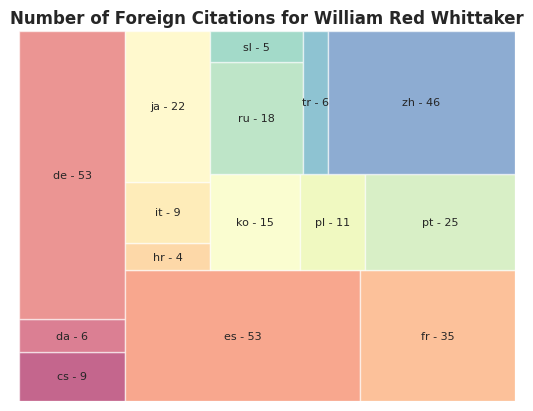

In [ ]:
lang_treeplot("William Red Whittaker", entre_lang, 4)

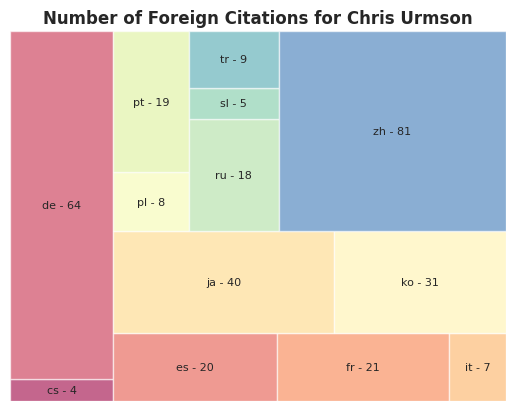

In [ ]:
lang_treeplot("Chris Urmson", entre_lang, 4)

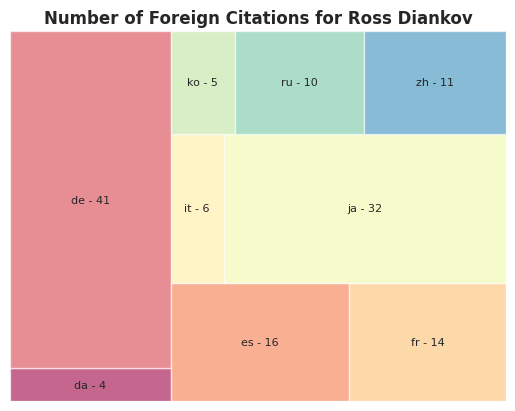

In [ ]:
lang_treeplot("Ross Diankov", entre_lang, 4)

# Founders

In [ ]:
founder_pubs = pd.read_excel("founder_pubs.xlsx")
founder_pubs.shape

(341, 8)

In [ ]:
founder_cits = pd.read_excel("founder_citations.xlsx")
founder_cits.shape

(15271, 5)

In [ ]:
founder_pubs = founder_pubs.drop_duplicates(subset = ["title", "researcher"])
founder_pubs.shape

(330, 8)

In [ ]:
founder_df = pd.merge(founder_cits, founder_pubs, left_on = "cited", right_on = "title", how = "left")
founder_df.shape

(15313, 13)

In [ ]:
founder_df.head()

,cited,citing,authors_x,publication_x,snippet,researcher,title,authors_y,position,publication_y,year,num_citations,citation_link
0,Burning plasma achieved in inertial fusion,Physics principles of inertial confinement fus...,"['OA Hurricane', 'PK Patel', 'R Betti', 'DH Fr...","Reviews of Modern …, 2023",Inertial confinement fusion (ICF) has existed ...,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Burning plasma achieved in inertial fusion,Current challenges in the physics of white dwa...,"['D Saumon', 'S Blouin', 'PE Trembl']","Physics Reports, 2022",White dwarfs are a class of stars with unique ...,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Burning plasma achieved in inertial fusion,Lawson criterion for ignition exceeded in an i...,"['H Abu-Shawareb', 'R Acree', 'P Adams', 'J Ad...","Physical review …, 2022","For more than half a century, researchers arou...",Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Burning plasma achieved in inertial fusion,Design of inertial fusion implosions reaching ...,"['AL Kritcher', 'CV Young', 'HF Robey', 'CR We...","Nature Physics, 2022","In a burning plasma state,,,,,–, alpha particl...",Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Burning plasma achieved in inertial fusion,Achievement of target gain larger than unity i...,"['H Abu-Shawareb', 'R Acree', 'P Adams', 'J Ad...","Physical Review Letters, 2024","On December 5, 2022, an indirect drive fusion ...",Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
founder_df = founder_df[["researcher", "title", "citing", "year"]]
founder_df.head()

,researcher,title,citing,year
0,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Physics principles of inertial confinement fus...,2022
1,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Current challenges in the physics of white dwa...,2022
2,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Lawson criterion for ignition exceeded in an i...,2022
3,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Design of inertial fusion implosions reaching ...,2022
4,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Achievement of target gain larger than unity i...,2022


In [ ]:
founder_df["language"] = founder_df["citing"].apply(detect_lang)
founder_df.head()

,researcher,title,citing,year,language
0,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Physics principles of inertial confinement fus...,2022,en
1,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Current challenges in the physics of white dwa...,2022,en
2,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Lawson criterion for ignition exceeded in an i...,2022,en
3,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Design of inertial fusion implosions reaching ...,2022,en
4,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,Achievement of target gain larger than unity i...,2022,en


In [ ]:
founder_lang_df = pd.read_excel("founder_citations_language.xlsx")

In [ ]:
founder_lang = author_lang(founder_lang_df)
founder_lang.head(50)

,researcher,language,Counts
1,Austin Draycott,an,1
0,Austin Draycott,en,366
2,Austin Draycott,zh,1
4,Christopher R Carlson,ar,1
3,Christopher R Carlson,en,500
5,Christopher R Carlson,it,1
6,Christopher R Carlson,pl,1
7,Christopher R Carlson,zh,1
10,Cole J. T. Lewis,de,3
8,Cole J. T. Lewis,en,263


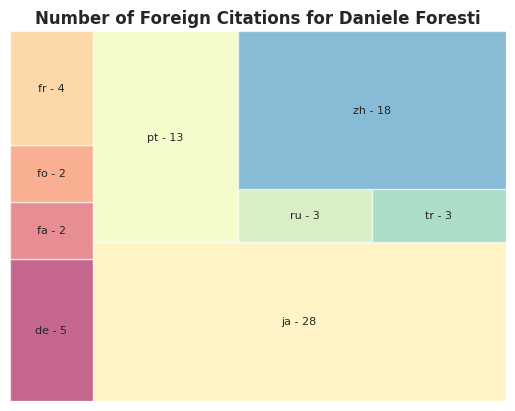

In [ ]:
lang_treeplot("Daniele Foresti", founder_lang, 2)

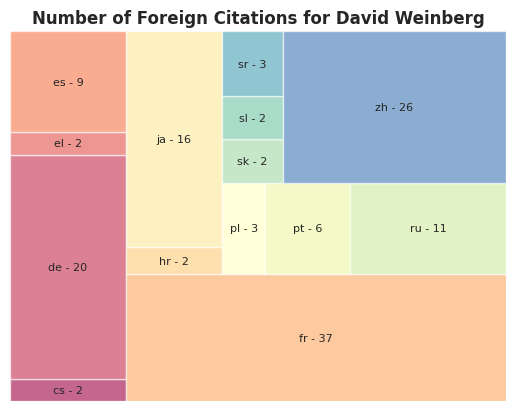

In [ ]:
lang_treeplot("David Weinberg", founder_lang, 2)

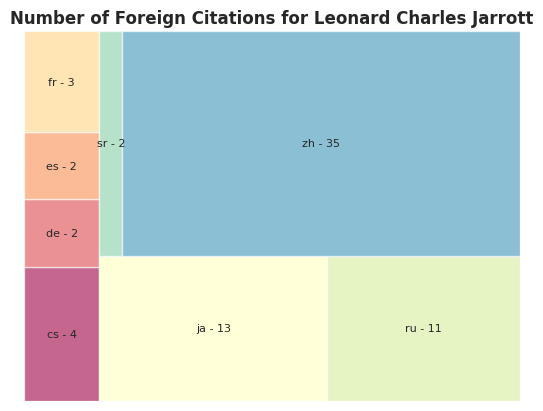

In [ ]:
lang_treeplot("Leonard Charles Jarrott", founder_lang, 2)

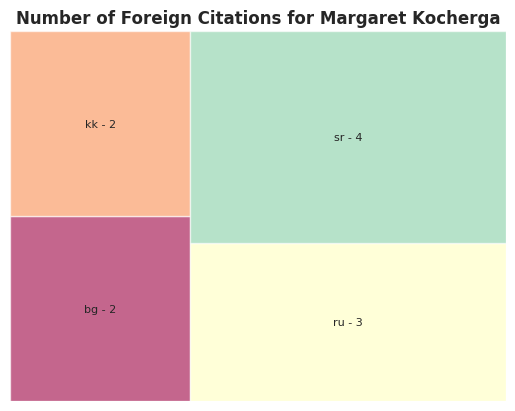

In [ ]:
lang_treeplot("Margaret Kocherga", founder_lang, 2)

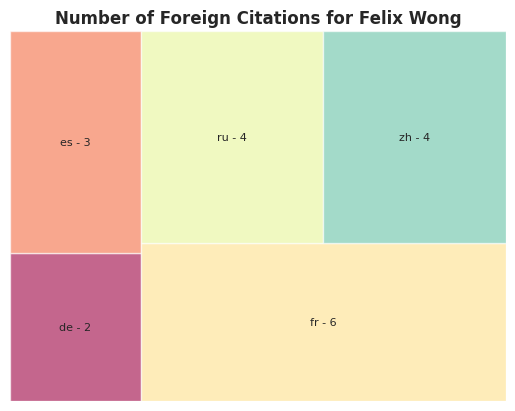

In [ ]:
lang_treeplot("Felix Wong", founder_lang, 2)

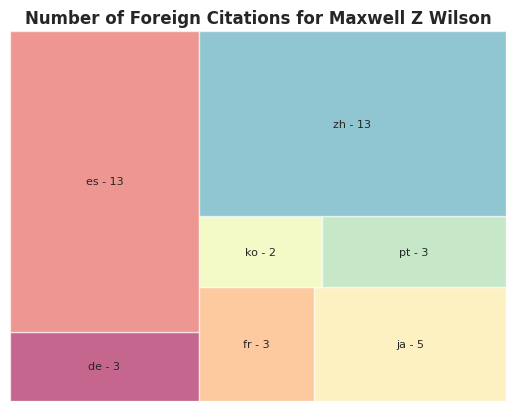

In [ ]:
lang_treeplot("Maxwell Z Wilson", founder_lang, 2)

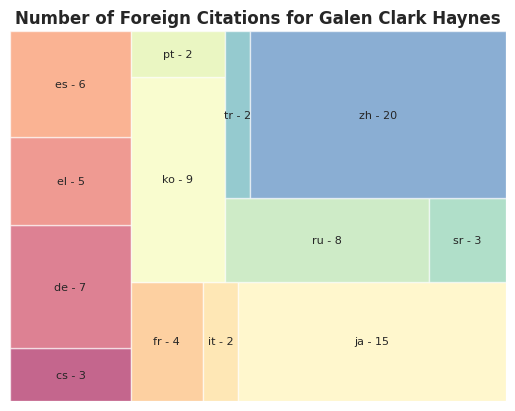

In [ ]:
lang_treeplot("Galen Clark Haynes", founder_lang, 2)

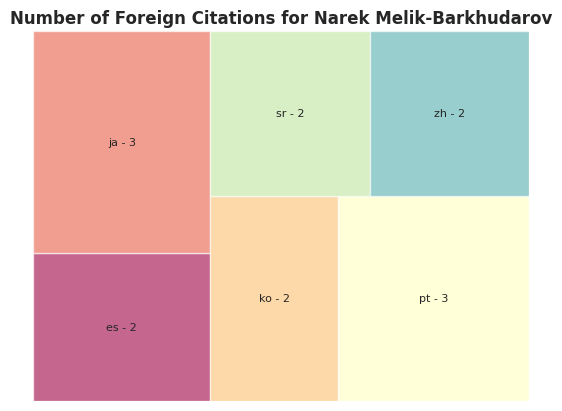

In [ ]:
lang_treeplot("Narek Melik-Barkhudarov", founder_lang, 2)

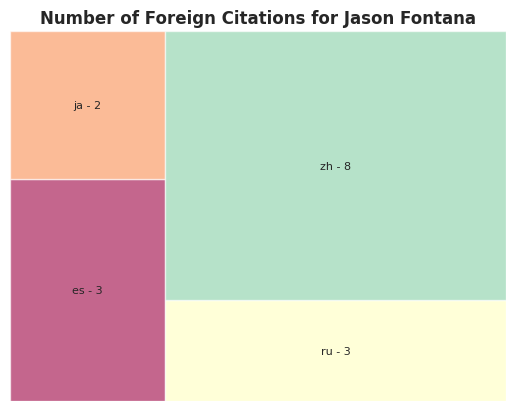

In [ ]:
lang_treeplot("Jason Fontana", founder_lang, 2)